In [109]:
import pandas as pd

data=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\NLP\proje\SentimentyBot\tweets_labeled.csv")

data.head(5)

,tweet_id,tweet,date,label
0,1606767075984375808,Berk Ali (kedim) seni çok özledim. Ölmek için ...,2022-12-24 21:41:37+00:00,1
1,1537178207677448193,"Yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-15 21:00:18+00:00,1
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-13 21:21:36+00:00,1
3,1495413883166760960,"Öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 15:03:47+00:00,1
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 20:22:32+00:00,1


EKSİK DEĞERLERE BAKMAK VE GEREKLİ İŞLEMLER

* Eksik ve hatalı verileri belirleme
* Eksik verileri doldurma VEYA silme VEYA yapay zeka ile tahminini yapabiliriz
* Aykırı değerleri kaldırma
* sayısal veri haline ve normalize et

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  12960 non-null  int64 
 1   tweet     12959 non-null  object
 2   date      12960 non-null  object
 3   label     12960 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 405.1+ KB


In [111]:
data.describe()

,tweet_id,label
count,1.296000e+04,12960.000000
mean,1.554235e+18,-0.100077
std,4.106405e+16,0.581448
min,1.477067e+18,-1.000000
25%,1.518165e+18,0.000000
50%,1.560655e+18,0.000000
75%,1.592191e+18,0.000000
max,1.608968e+18,1.000000


In [112]:
nan_counts = data.isnull().sum()
print(nan_counts)

tweet_id    0
tweet       1
date        0
label       0
dtype: int64


In [113]:
#NaN veri az dataframe sildim
data=data.dropna()
nan_counts = data.isnull().sum()
print(nan_counts)

tweet_id    0
tweet       0
date        0
label       0
dtype: int64


Türkiye genellikle GMT+03:00 bu yüzden güncelledik

In [114]:
# 'date' sütununu datetime formatına dönüştür
data['date'] = pd.to_datetime(data['date'])
print(data['date'].head(2))
print("****************************")
# Saat dilimini UTC'den GMT+3'e çevir
data['date'] = data['date'].dt.tz_convert('Etc/GMT-3')

# Güncellenmiş DataFrame'i göster
print(data.head(3))

0   2022-12-24 21:41:37+00:00
1   2022-06-15 21:00:18+00:00
Name: date, dtype: datetime64[ns, UTC]
****************************
              tweet_id                                              tweet  \
0  1606767075984375808  Berk Ali (kedim) seni çok özledim. Ölmek için ...   
1  1537178207677448193  Yani, öylesine ciddiye alacaksın ki yaşamayı, ...   
2  1536458790802972673            saçlarının gölgesinde\nölmek ne güzeldi   

                       date  label  
0 2022-12-25 00:41:37+03:00      1  
1 2022-06-16 00:00:18+03:00      1  
2 2022-06-14 00:21:36+03:00      1  


In [115]:
def getseason(date):#mevsim bulma fonksiyonu
    month=date.month
    print(month)
    if month in [12,1,2]:
        return "winter"
    elif month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    else:
        return "autumn"

# **4 saatlik periyotlar oluşturma**
def get_time_period(date):
    hour = date.hour
    if 22 <= hour or hour < 2:
        return '22:00-02:00'
    elif 2 <= hour < 6:
        return '02:00-06:00'
    elif 6 <= hour < 10:
        return '06:00-10:00'
    elif 10 <= hour < 14:
        return '10:00-14:00'
    elif 14 <= hour < 18:
        return '14:00-18:00'
    else:
        return '18:00-22:00'

data['periyot'] = data['date'].apply(get_time_period)    

# apply() fonksiyonu ile her bir tarihi işleyerek 'season' sütununu ekle
data['season'] = data['date'].apply(getseason)
print("*************************")


# **Gün bilgisi ekleme (Haftanın günü)**
data['day'] = data['date'].dt.day_name()  # Örn: Monday, Tuesday


12
6
6
2
2
2
2
12
10
6
1
12
12
12
12
11
10
10
7
6
5
2
10
8
11
1
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
12
12
11
11
11
10
9
12
12
12
12
12
10
9
9
8
7
7
7
7
6
6
5
5
5
3
2
8
7
6
6
5
4
4
4
4
4
4
3
2
2
2
1
1
1
1
12
12
12
12
12
11
10
10
10
9
9
8
8
7
7
7
6
6
6
5
5
5
4
4
4
3
1
1
1
1
12
12
11
11
11
10
10
9
8
7
7
4
3
3
2
2
1
1
1
1
1
7
11
10
10
9
8
8
7
7
7
6
5
4
3
3
3
2
2
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12

In [116]:
data=data.drop('date',axis=1)
# İlk 3 satırı yazdır
print(data.head())

              tweet_id                                              tweet  \
0  1606767075984375808  Berk Ali (kedim) seni çok özledim. Ölmek için ...   
1  1537178207677448193  Yani, öylesine ciddiye alacaksın ki yaşamayı, ...   
2  1536458790802972673            saçlarının gölgesinde\nölmek ne güzeldi   
3  1495413883166760960  Öyle güzel baktın ki, gözlerime\nsevmek değil ...   
4  1490420667614904334  sevmek biri için ölmek değil her şeye rağmen y...   

   label      periyot  season       day  
0      1  22:00-02:00  winter    Sunday  
1      1  22:00-02:00  summer  Thursday  
2      1  22:00-02:00  summer   Tuesday  
3      1  18:00-22:00  winter    Sunday  
4      1  22:00-02:00  winter    Sunday  


In [117]:
#label değişkenini düzenleme
def  labelset(label):
    if label == -1:
        return "negatif"
    elif label == 1:
        return "pozitif"
    else:
        return  "nötr"
    


data['label'] = data['label'].apply(labelset)


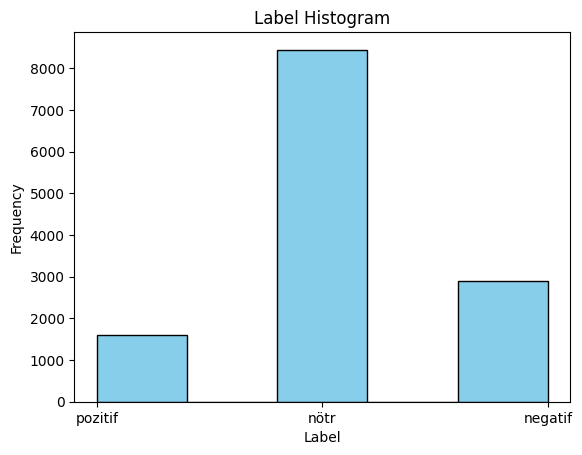

In [118]:
import matplotlib.pyplot as plt
# Histogram
plt.hist(data['label'], bins=5, color='skyblue', edgecolor='black')
plt.title('Label Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

attığım tweet nötr,negatif,pozitif olduğuna  karar vereceğim.bağımsız değişken tweet,bağımlı değişken label

In [119]:
data['tweet'] = data['tweet'].apply(lambda x: str(x).lower())

print(data['tweet'].head(2))

0    berk ali (kedim) seni çok özledim. ölmek için ...
1    yani, öylesine ciddiye alacaksın ki yaşamayı, ...
Name: tweet, dtype: object


In [120]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder objesi oluşturuluyor
le = LabelEncoder()

# 'label' sütununu sayısal değerlere dönüştür
data['label'] = le.fit_transform(data['label'])

print(data['label'].head(3))


0    2
1    2
2    2
Name: label, dtype: int32


tweet ile TF-Idf matrisini oluşturma

In [121]:
y=data['label']
X=data['tweet']

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# İlk belgenin vektör temsili
print(f"****{X_tf_idf_word[0]}")

# Dense (yoğun) formatta göstermek içi=>İlk belgenin tüm özellikler (kelimeler) için TF-IDF değerlerini gösterir.
print("\nDense format:")
print(X_tf_idf_word[0].toarray())



****  (0, 5779)	0.34136979797876715
  (0, 1533)	0.28993418557386347
  (0, 22210)	0.3232612547684203
  (0, 31801)	0.3155175956776701
  (0, 43062)	0.12228519644135406
  (0, 44051)	0.2825731104774163
  (0, 43645)	0.2237036589925275
  (0, 19893)	0.13079120955567264
  (0, 8371)	0.15377168101444116
  (0, 24562)	0.37667312178078016
  (0, 32615)	0.16868991387706417
  (0, 29063)	0.277849424724477
  (0, 38215)	0.11025878927943088
  (0, 17726)	0.18311045154914377
  (0, 32360)	0.34136979797876715

Dense format:
[[0. 0. 0. ... 0. 0. 0.]]


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word, y, train_size=0.8, random_state=42, shuffle=True)

# Modeli tanımlama
lg = LogisticRegression()

# Modeli eğitim verisiyle eğitme
model = lg.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
predict = model.predict(X_test)

# Classification report yazdırma
print("Classification Report:\n", classification_report(y_test, predict))

# Log loss (kayıp fonksiyonu) hesaplama
# Logistic regression için probability tahminleri kullanmalısınız (predict_proba)
probabilities = model.predict_proba(X_test)  # Test verisi için olasılık tahminleri
loss = log_loss(y_test, probabilities)

print("\nLog Loss: ", loss)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.23      0.35       567
           1       0.71      0.96      0.81      1695
           2       0.77      0.26      0.39       330

    accuracy                           0.71      2592
   macro avg       0.74      0.48      0.51      2592
weighted avg       0.72      0.71      0.66      2592


Log Loss:  0.6874534861601999


tweets_21.csv ile modelimizi kontrol etme?

In [124]:
data2=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\NLP\proje\SentimentyBot\tweets_21.csv")
print(data2.head(3))



              tweet_id                                              tweet  \
0  1344798002490314752  Kardesim (12) sevdigi cocuga 00:00 da ilan-i a...   
1  1344799527673470977  Bu yılbaşı da saat tam 00:00'da swni seviyorum...   
2  1344799907719348226  tam 00.00da naptınız ben her yıl tam bu vakit ...   

                  date  
0  2021-01-01 03:10:03  
1  2021-01-01 03:16:07  
2  2021-01-01 03:17:37  


In [125]:

data2['tweet'] = data2['tweet'].apply(lambda x: str(x).lower())


from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word2 = tf_idf_word_vectorizer.fit(X).transform(data2['tweet'])




In [126]:
nan_counts = data2.isnull().sum()
print(nan_counts)








tweet_id    0
tweet       0
date        0
dtype: int64


In [127]:

# Modeli tanımlama
lg = LogisticRegression()


# Test verisi üzerinde tahmin yapma
predict = model.predict(X_tf_idf_word2)

data2['label']=predict
print(predict)

[1 1 1 ... 1 1 1]


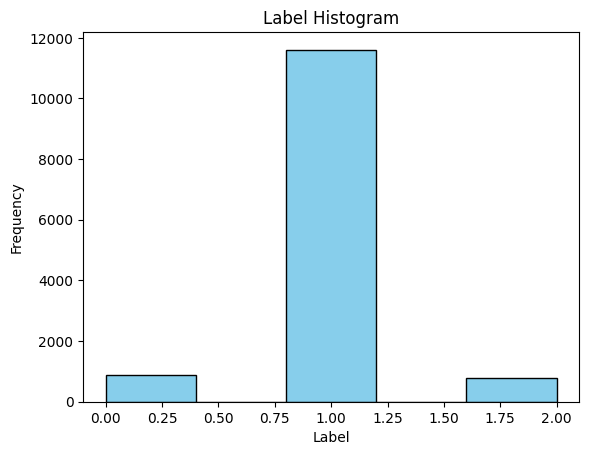

In [128]:
import matplotlib.pyplot as plt
# Histogram
plt.hist(predict, bins=5, color='skyblue', edgecolor='black')
plt.title('Label Histogram')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [129]:
print(data2.head(3))

              tweet_id                                              tweet  \
0  1344798002490314752  kardesim (12) sevdigi cocuga 00:00 da ilan-i a...   
1  1344799527673470977  bu yılbaşı da saat tam 00:00'da swni seviyorum...   
2  1344799907719348226  tam 00.00da naptınız ben her yıl tam bu vakit ...   

                  date  label  
0  2021-01-01 03:10:03      1  
1  2021-01-01 03:16:07      1  
2  2021-01-01 03:17:37      1  


Burada # Normalizing Case Folding,Punctuations,Numbers,Stopwords,Rarewords,Tokenization,Lemmatization sonuçları iyileştirmesi kontrolü

In [130]:
import pandas as pd

data=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\NLP\proje\SentimentyBot\tweets_labeled.csv")

data.head(5)

,tweet_id,tweet,date,label
0,1606767075984375808,Berk Ali (kedim) seni çok özledim. Ölmek için ...,2022-12-24 21:41:37+00:00,1
1,1537178207677448193,"Yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-15 21:00:18+00:00,1
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-13 21:21:36+00:00,1
3,1495413883166760960,"Öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 15:03:47+00:00,1
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 20:22:32+00:00,1


In [131]:
nan_counts = data.isnull().sum()
print(nan_counts)

tweet_id    0
tweet       1
date        0
label       0
dtype: int64


In [132]:
#NaN veri az dataframe sildim
data=data.dropna()
nan_counts = data.isnull().sum()
print(nan_counts)

tweet_id    0
tweet       0
date        0
label       0
dtype: int64


In [133]:
# 'date' sütununu datetime formatına dönüştür
data['date'] = pd.to_datetime(data['date'])
print(data['date'].head(2))
print("****************************")
# Saat dilimini UTC'den GMT+3'e çevir
data['date'] = data['date'].dt.tz_convert('Etc/GMT-3')

# Güncellenmiş DataFrame'i göster
print(data.head(3))

0   2022-12-24 21:41:37+00:00
1   2022-06-15 21:00:18+00:00
Name: date, dtype: datetime64[ns, UTC]
****************************
              tweet_id                                              tweet  \
0  1606767075984375808  Berk Ali (kedim) seni çok özledim. Ölmek için ...   
1  1537178207677448193  Yani, öylesine ciddiye alacaksın ki yaşamayı, ...   
2  1536458790802972673            saçlarının gölgesinde\nölmek ne güzeldi   

                       date  label  
0 2022-12-25 00:41:37+03:00      1  
1 2022-06-16 00:00:18+03:00      1  
2 2022-06-14 00:21:36+03:00      1  


In [134]:
def getseason(date):#mevsim bulma fonksiyonu
    month=date.month
    print(month)
    if month in [12,1,2]:
        return "winter"
    elif month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    else:
        return "autumn"

# **4 saatlik periyotlar oluşturma**
def get_time_period(date):
    hour = date.hour
    if 22 <= hour or hour < 2:
        return '22:00-02:00'
    elif 2 <= hour < 6:
        return '02:00-06:00'
    elif 6 <= hour < 10:
        return '06:00-10:00'
    elif 10 <= hour < 14:
        return '10:00-14:00'
    elif 14 <= hour < 18:
        return '14:00-18:00'
    else:
        return '18:00-22:00'

data['periyot'] = data['date'].apply(get_time_period)    

# apply() fonksiyonu ile her bir tarihi işleyerek 'season' sütununu ekle
data['season'] = data['date'].apply(getseason)
print("*************************")


# **Gün bilgisi ekleme (Haftanın günü)**
data['day'] = data['date'].dt.day_name()  # Örn: Monday, Tuesday


12
6
6
2
2
2
2
12
10
6
1
12
12
12
12
11
10
10
7
6
5
2
10
8
11
1
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
12
12
11
11
11
10
9
12
12
12
12
12
10
9
9
8
7
7
7
7
6
6
5
5
5
3
2
8
7
6
6
5
4
4
4
4
4
4
3
2
2
2
1
1
1
1
12
12
12
12
12
11
10
10
10
9
9
8
8
7
7
7
6
6
6
5
5
5
4
4
4
3
1
1
1
1
12
12
11
11
11
10
10
9
8
7
7
4
3
3
2
2
1
1
1
1
1
7
11
10
10
9
8
8
7
7
7
6
5
4
3
3
3
2
2
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12

In [135]:
data=data.drop('date',axis=1)
# İlk 3 satırı yazdır
print(data.head())

              tweet_id                                              tweet  \
0  1606767075984375808  Berk Ali (kedim) seni çok özledim. Ölmek için ...   
1  1537178207677448193  Yani, öylesine ciddiye alacaksın ki yaşamayı, ...   
2  1536458790802972673            saçlarının gölgesinde\nölmek ne güzeldi   
3  1495413883166760960  Öyle güzel baktın ki, gözlerime\nsevmek değil ...   
4  1490420667614904334  sevmek biri için ölmek değil her şeye rağmen y...   

   label      periyot  season       day  
0      1  22:00-02:00  winter    Sunday  
1      1  22:00-02:00  summer  Thursday  
2      1  22:00-02:00  summer   Tuesday  
3      1  18:00-22:00  winter    Sunday  
4      1  22:00-02:00  winter    Sunday  


In [136]:
#label değişkenini düzenleme
def  labelset(label):
    if label == -1:
        return "negatif"
    elif label == 1:
        return "pozitif"
    else:
        return  "nötr"
    


data['label'] = data['label'].apply(labelset)


In [137]:
data['tweet'] = data['tweet'].apply(lambda x: str(x).lower())

print(data['tweet'].head(2))

0    berk ali (kedim) seni çok özledim. ölmek için ...
1    yani, öylesine ciddiye alacaksın ki yaşamayı, ...
Name: tweet, dtype: object


In [138]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder objesi oluşturuluyor
le = LabelEncoder()

# 'label' sütununu sayısal değerlere dönüştür
data['label'] = le.fit_transform(data['label'])

print(data['label'].head(3))


0    2
1    2
2    2
Name: label, dtype: int32


In [139]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

# Gerekli NLTK dosyalarını indirme (ilk defa çalıştırılacaksa)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopwords listesi
stop_words = set(stopwords.words('english'))

# Lemmatizer nesnesi
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Verilen bir metni ön işleme adımlarından geçirir.
    
    Parametreler:
    text: str
        İşlenecek metin (tweet)
        
    Return:
    str:
        Ön işlenmiş metin
    """
    # Küçük harfe dönüştürme
    text = text.lower()
    
    # Noktalama ve sayıları kaldırma
    text = ''.join([char for char in text if char not in string.punctuation])  # Noktalama işaretlerini kaldır
    text = ''.join([char for char in text if not char.isdigit()])  # Sayıları kaldır

    # Tokenization (kelimelere ayırma)
    tokens = word_tokenize(text)

    # Rare words'ü temizlemek için kelimeleri sıklıklarına göre filtreleme
    fdist = FreqDist(tokens)
    rare_words = set([word for word, freq in fdist.items() if freq <= 2])  # Sıklığı 2'den az olanları rare kabul ediyoruz
    tokens = [word for word in tokens if word not in rare_words]  # Rare kelimeleri çıkar

    # Stopwords'ü kaldırma
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization (kelime köklerine indirgeme)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Tekrar birleştirme (detokenization)
    processed_text = TreebankWordDetokenizer().detokenize(tokens)
    
    return processed_text

# Veriye apply ile işlemleri uygulama
data['tweet'] = data['tweet'].apply(preprocess_text)

# İşlenmiş tweetleri görmek
print(data['tweet'].head())



y=data['label']
X=data['tweet']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    
1    
2    
3    
4    
Name: tweet, dtype: object


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# İlk belgenin vektör temsili
print(f"****{X_tf_idf_word[0]}")

# Dense (yoğun) formatta göstermek içi=>İlk belgenin tüm özellikler (kelimeler) için TF-IDF değerlerini gösterir.
print("\nDense format:")
print(X_tf_idf_word[0].toarray())



****

Dense format:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word, y, train_size=0.8, random_state=42, shuffle=True)

# Modeli tanımlama
lg = LogisticRegression()

# Modeli eğitim verisiyle eğitme
model = lg.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
predict = model.predict(X_test)

# Classification report yazdırma
print("Classification Report:\n", classification_report(y_test, predict))

# Log loss (kayıp fonksiyonu) hesaplama
# Logistic regression için probability tahminleri kullanmalısınız (predict_proba)
probabilities = model.predict_proba(X_test)  # Test verisi için olasılık tahminleri
loss = log_loss(y_test, probabilities)

print("\nLog Loss: ", loss)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       567
           1       0.65      1.00      0.79      1695
           2       0.67      0.01      0.02       330

    accuracy                           0.65      2592
   macro avg       0.44      0.34      0.27      2592
weighted avg       0.51      0.65      0.52      2592


Log Loss:  0.8731100132107819
